In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### There are no missing values in the dataset

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges']

We have 18 categorical features : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [15]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values if necessary (for example, with 0)
df['TotalCharges'].fillna(0, inplace=True)

# Convert to int
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [16]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

We have 17 categorical features : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [17]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

customerID
7590-VHVEG    0.014198
3791-LGQCY    0.014198
6008-NAIXK    0.014198
5956-YHHRX    0.014198
5365-LLFYV    0.014198
                ...   
9796-MVYXX    0.014198
2637-FKFSY    0.014198
1552-AAGRX    0.014198
4304-TSPVK    0.014198
3186-AJIEK    0.014198
Name: proportion, Length: 7043, dtype: float64
---------------------------
gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64
---------------------------
Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64
---------------------------
Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64
---------------------------
PhoneService
Yes    90.316626
No      9.683374
Name: proportion, dtype: float64
---------------------------
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64
---------------------------
InternetService
Fiber optic    43.958540
DSL            34.374556
No       

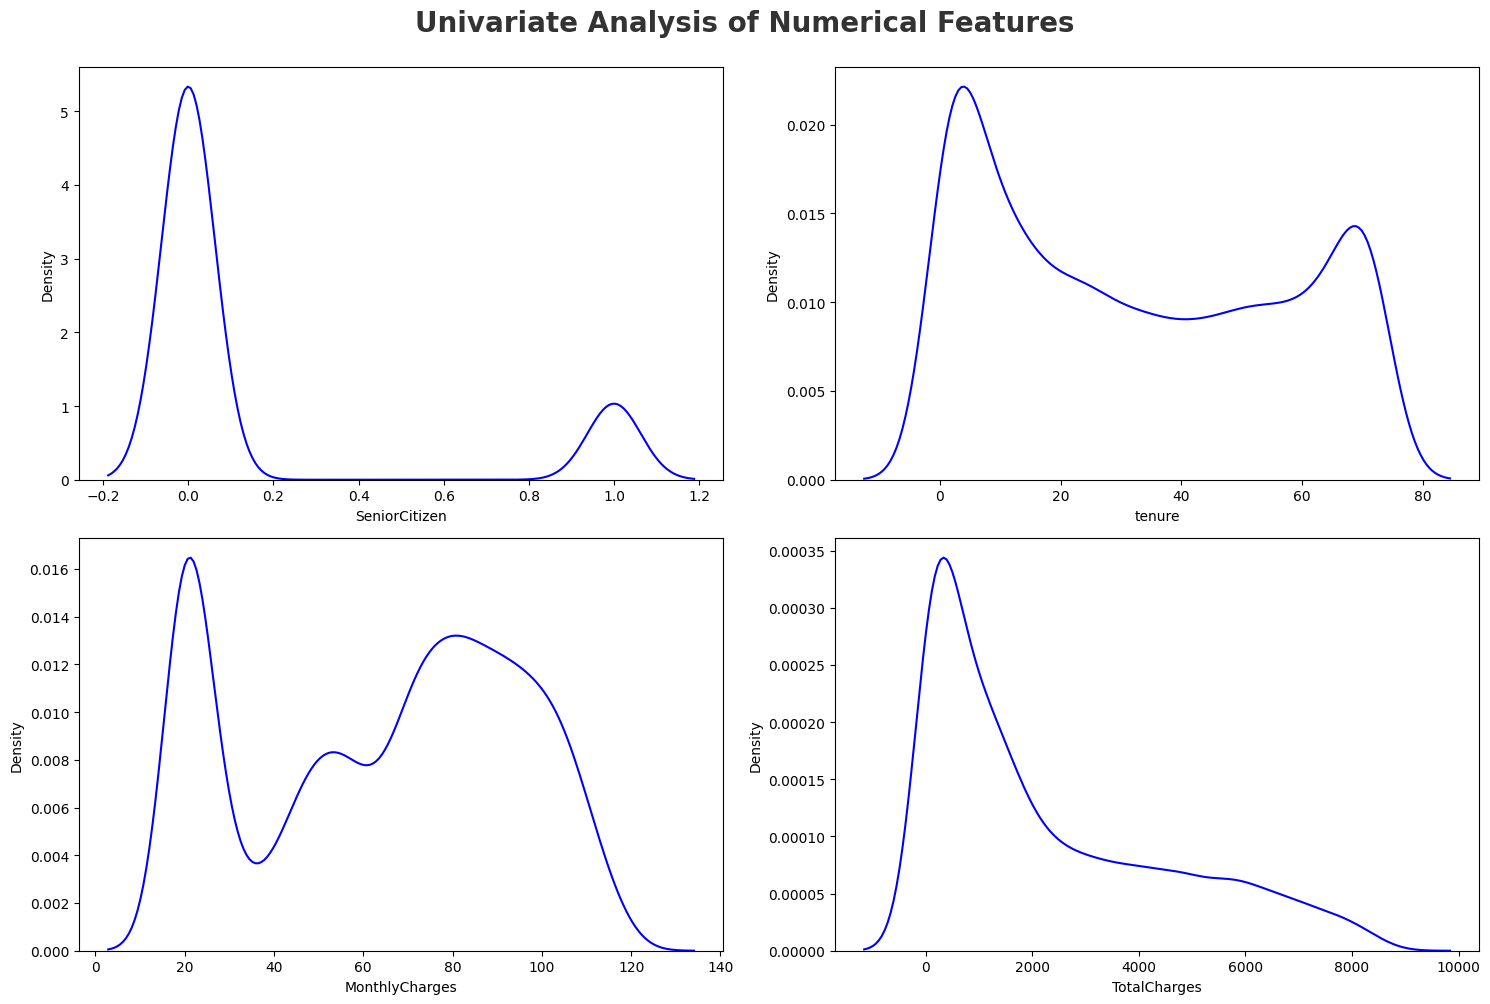

In [18]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    

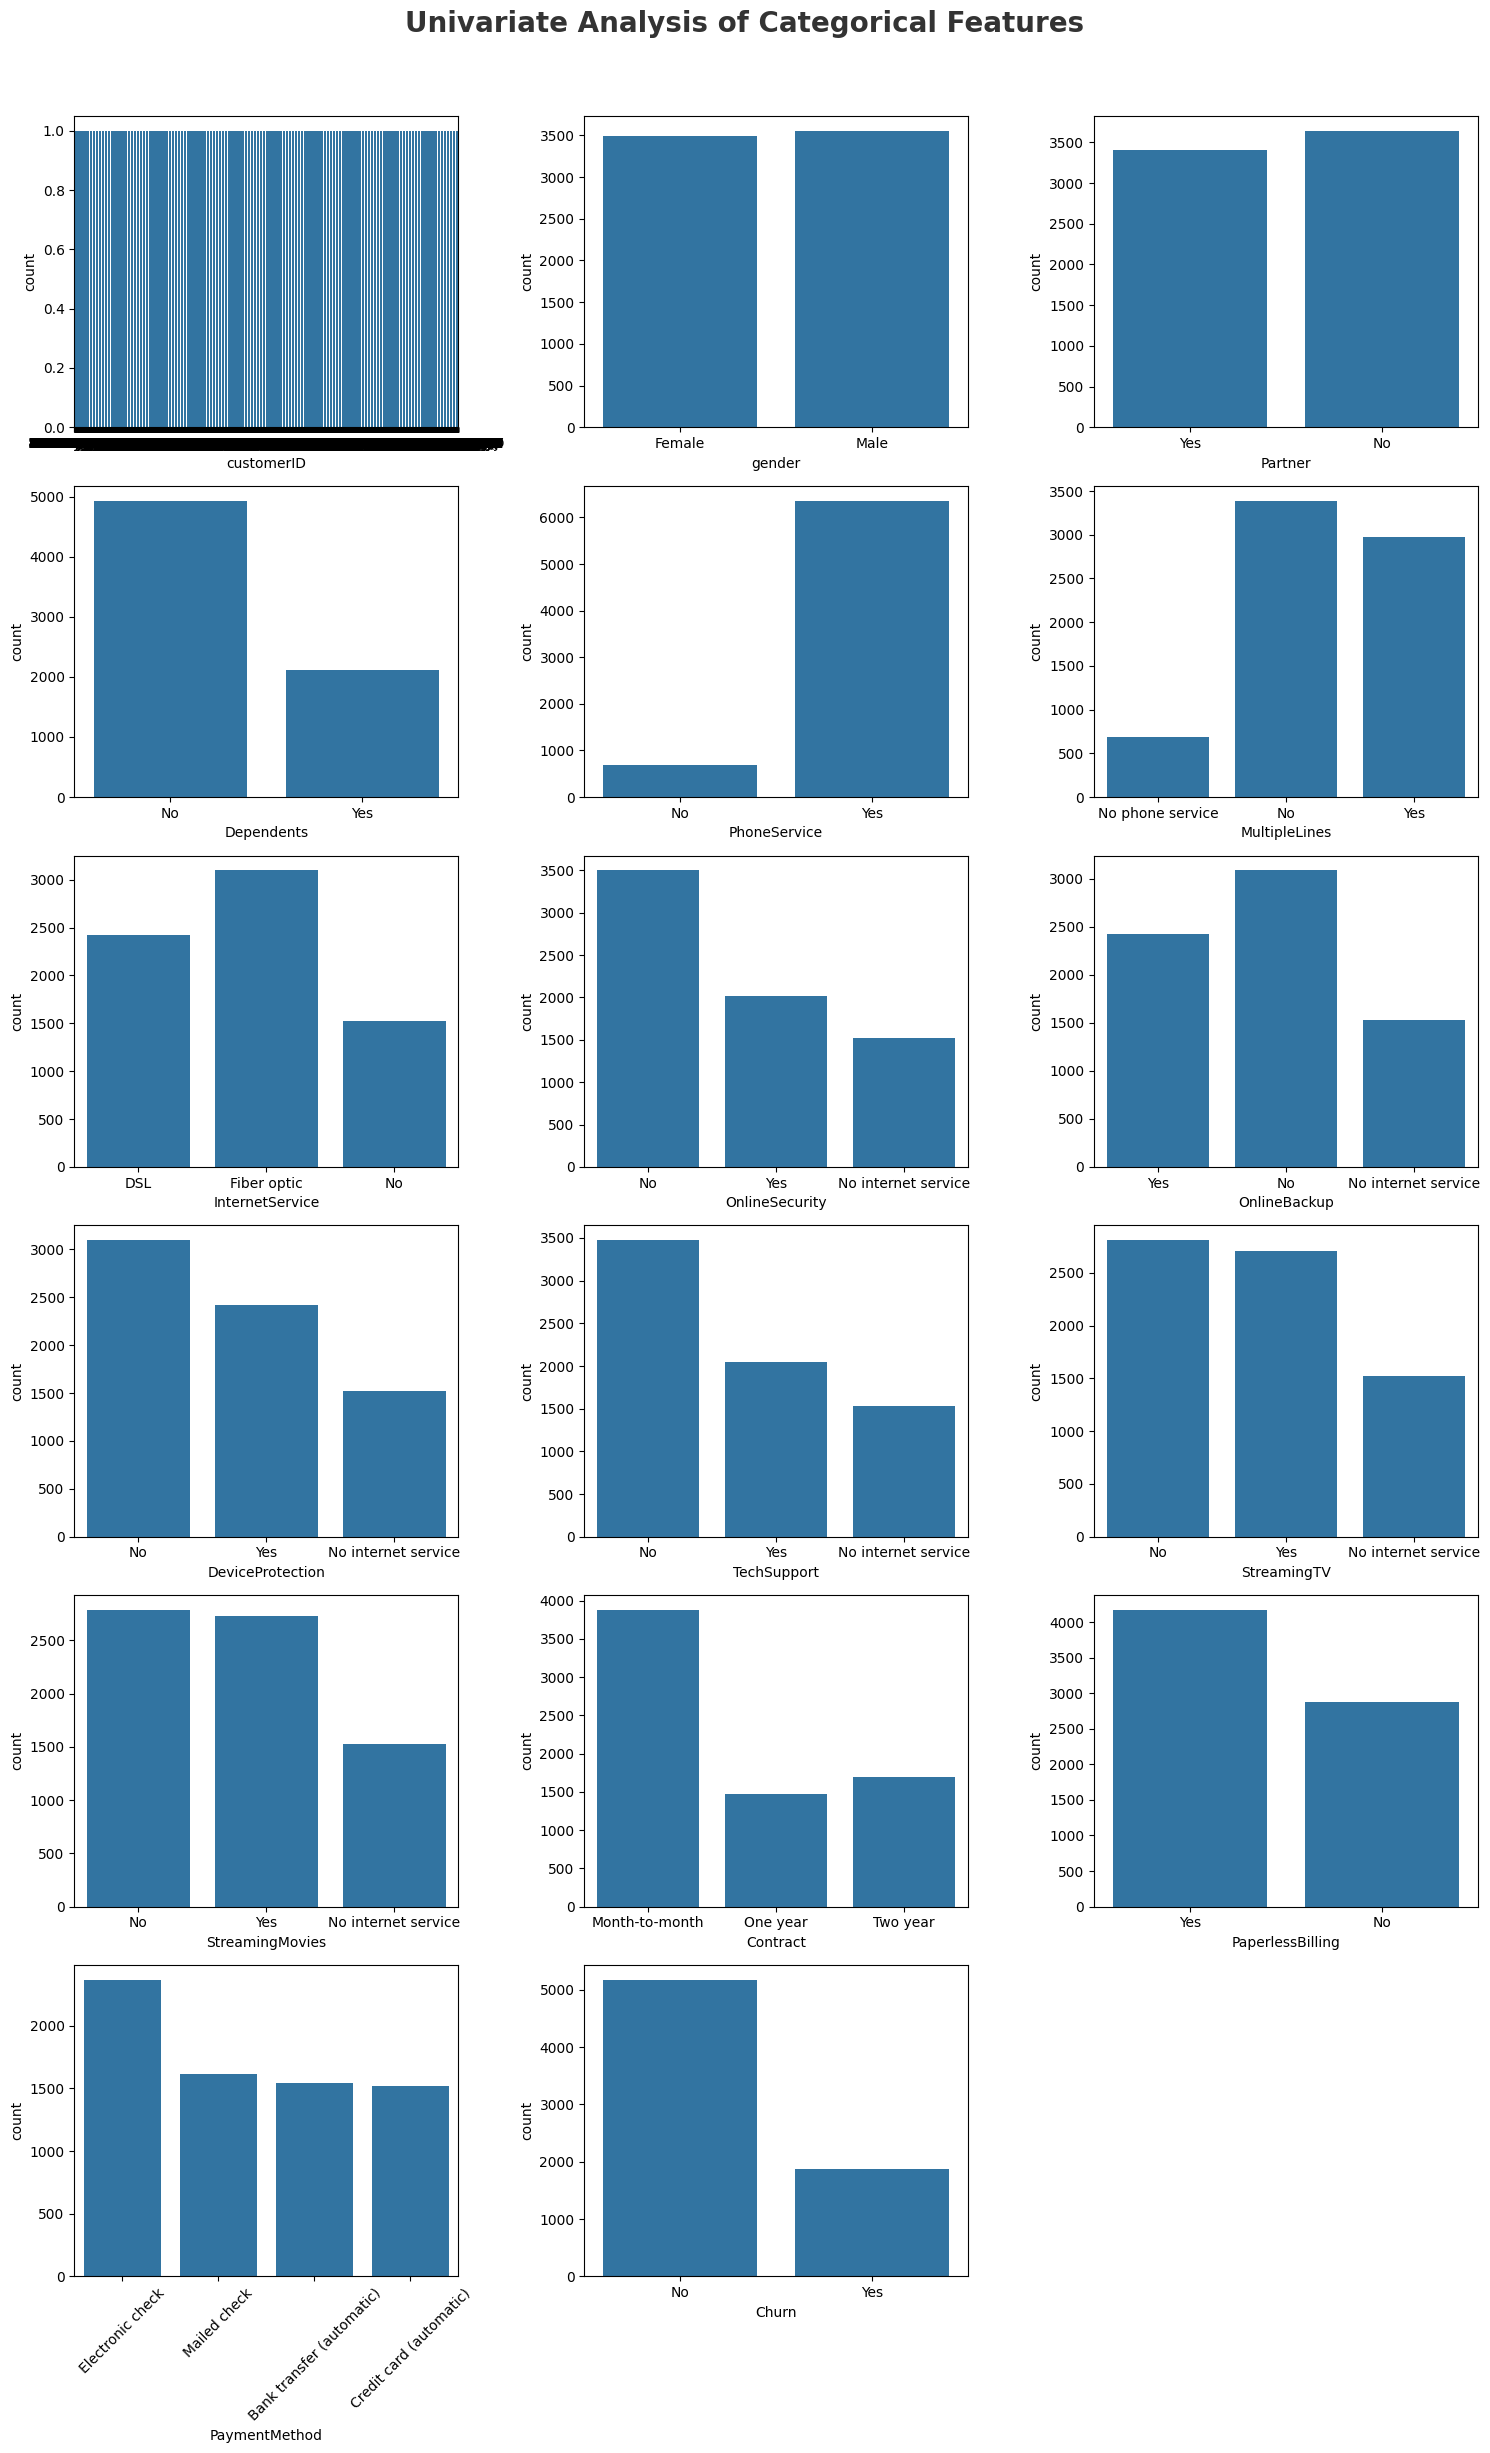

In [19]:
# Calculate the number of rows and columns based on the number of categorical features
#categorical_features.remove('customerID')
num_features = len(categorical_features)
num_cols = 3
num_rows = (num_features // num_cols) + (1 if num_features % num_cols != 0 else 0)

plt.figure(figsize=(15, num_rows * 4))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(0, num_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    if categorical_features[i] == 'PaymentMethod':
        plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [20]:
df = df.drop(['customerID'], axis = 1)

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 1 discrete features : ['SeniorCitizen']

We have 3 continuous_features : ['tenure', 'MonthlyCharges', 'TotalCharges']


A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

A chi-square statistic is one way to show a relationship between two categorical variables.

Here we test correlation of Categorical columns with Target column i.e case_status

Null Hypothesis (H0
): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (H1
): The Feature and Target column are not independent (Correalted)

In [25]:
from scipy.stats import chi2_contingency
categorical_features = [col for col in categorical_features if col in df.columns and col != 'customerID']

chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Churn'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')

result = pd.DataFrame(data={'Column': categorical_features, 'Hypothesis Result': chi2_test})
result

,Column,Hypothesis Result
0,gender,Fail to Reject Null Hypothesis
1,Partner,Reject Null Hypothesis
2,Dependents,Reject Null Hypothesis
3,PhoneService,Fail to Reject Null Hypothesis
4,MultipleLines,Reject Null Hypothesis
5,InternetService,Reject Null Hypothesis
6,OnlineSecurity,Reject Null Hypothesis
7,OnlineBackup,Reject Null Hypothesis
8,DeviceProtection,Reject Null Hypothesis
9,TechSupport,Reject Null Hypothesis


Report

Here gender,PhoneService fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

In [26]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

discrete_features=[feature for feature in numeric_features if len(df[feature].unique()) < 10]
print('Num of discrete features :',discrete_features)

Num of continues features : ['tenure', 'MonthlyCharges', 'TotalCharges']
Num of discrete features : ['SeniorCitizen']


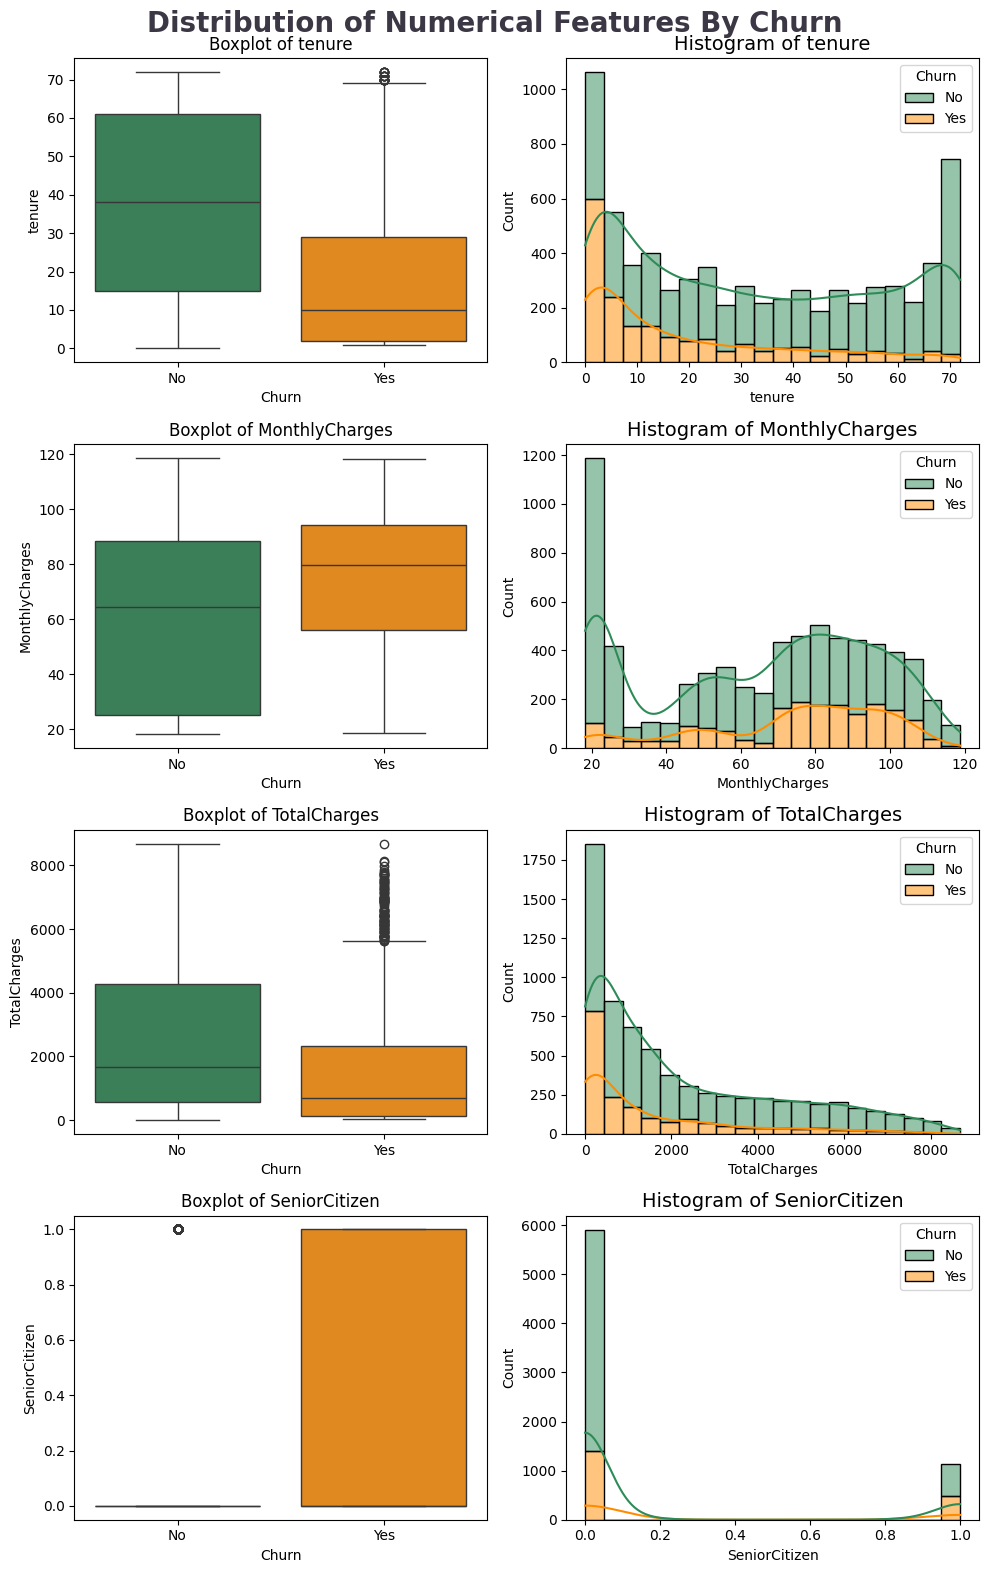

In [27]:
clr1 = ['#2E8B57', '#FF8C00']

# Combine continuous and discrete features
all_numeric_features = continues_features + discrete_features

fig, ax = plt.subplots(len(all_numeric_features), 2, figsize=(10, len(all_numeric_features) * 4))
fig.suptitle('Distribution of Numerical Features By Churn', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(all_numeric_features):   
    sns.boxplot(data=df, x='Churn', y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='Churn', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=14)

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

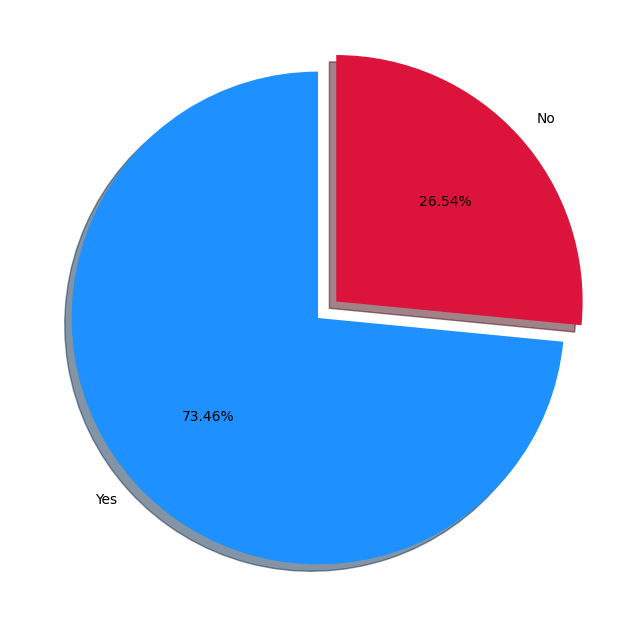

In [28]:
percentage = df.Churn.value_counts(normalize=True)*100
labels = ["Yes","No"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1E90FF', '#DC143C']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

In [29]:
# Group data by gender and churn status, calculate percentages
gender_churn = df.groupby('gender')['Churn'].value_counts(normalize=True).to_frame() * 100

In [30]:
gender_churn

proportion
gender Churn            
Female No      73.079128
       Yes     26.920872
Male   No      73.839662
       Yes     26.160338

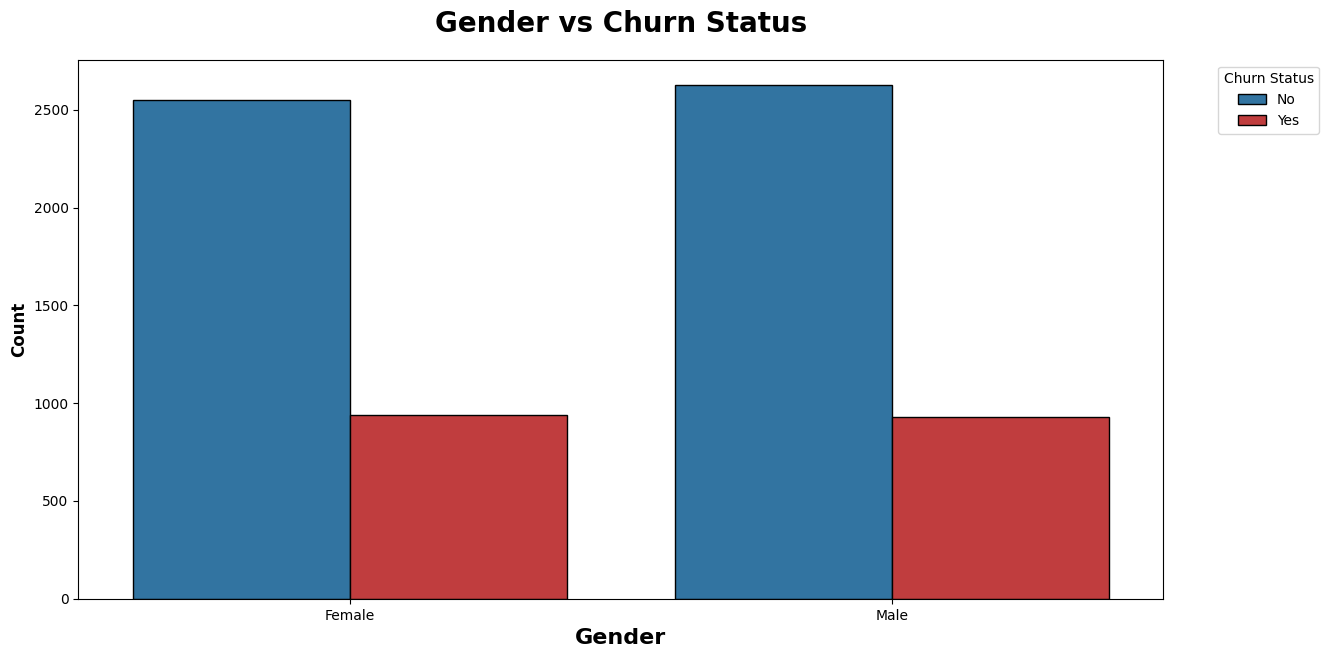

In [31]:
# Define the new color palette
new_palette = ['#1f77b4', '#d62728']  # Blue and Red

# Plot the count of gender by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="gender", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Gender vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

<Figure size 1400x700 with 0 Axes>

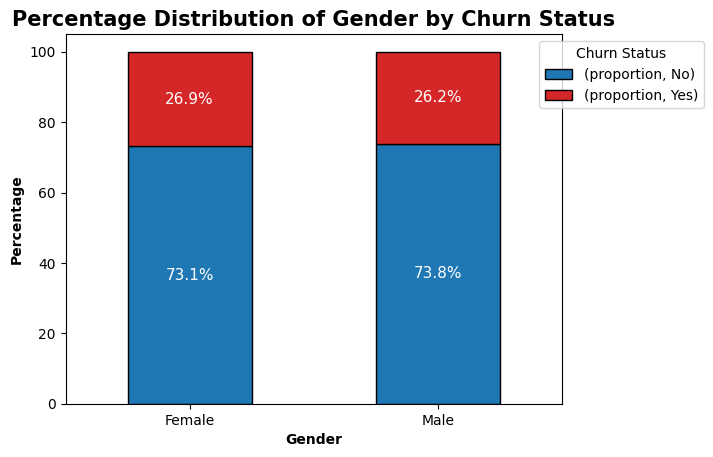

In [32]:
# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = gender_churn.unstack().plot(kind='bar', stacked=True, color=['#1f77b4', '#d62728'], edgecolor='black')
plt.title("Percentage Distribution of Gender by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [33]:
# Group data by partner and churn status, calculate percentages
partner_churn = df.groupby('Partner')['Churn'].value_counts(normalize=True).to_frame() * 100
partner_churn

proportion
Partner Churn            
No      No      67.042021
        Yes     32.957979
Yes     No      80.335097
        Yes     19.664903

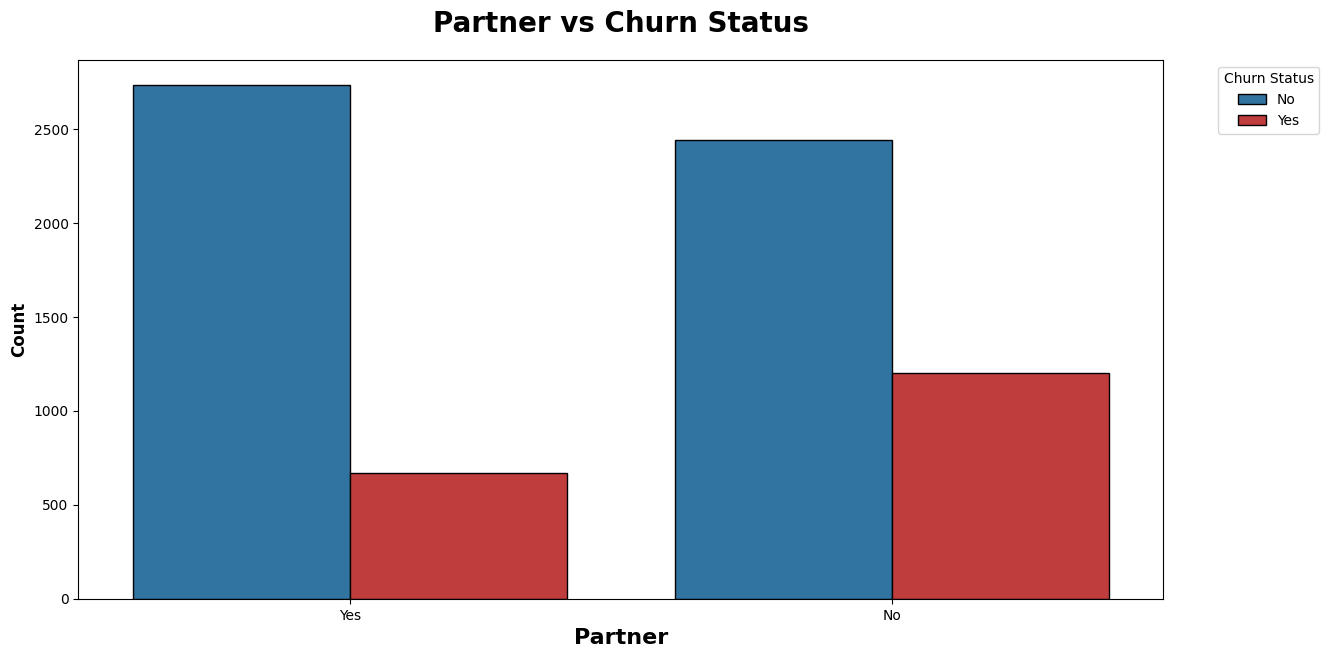

In [34]:
# Plot the count of partner by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="Partner", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Partner vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Partner", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

<Figure size 1400x700 with 0 Axes>

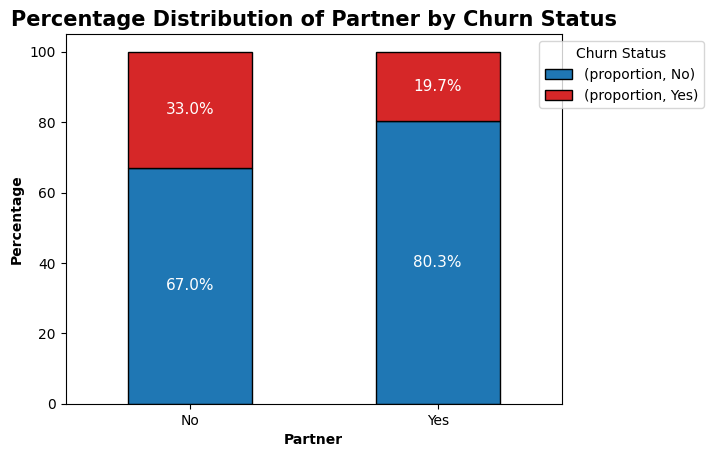

In [35]:
# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = partner_churn.unstack().plot(kind='bar', stacked=True, color=new_palette, edgecolor='black')
plt.title("Percentage Distribution of Partner by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Partner', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [36]:
# Group data by dependents and churn status, calculate percentages
dependents_churn = df.groupby('Dependents')['Churn'].value_counts(normalize=True).to_frame() * 100
dependents_churn

proportion
Dependents Churn            
No         No      68.720860
           Yes     31.279140
Yes        No      84.549763
           Yes     15.450237

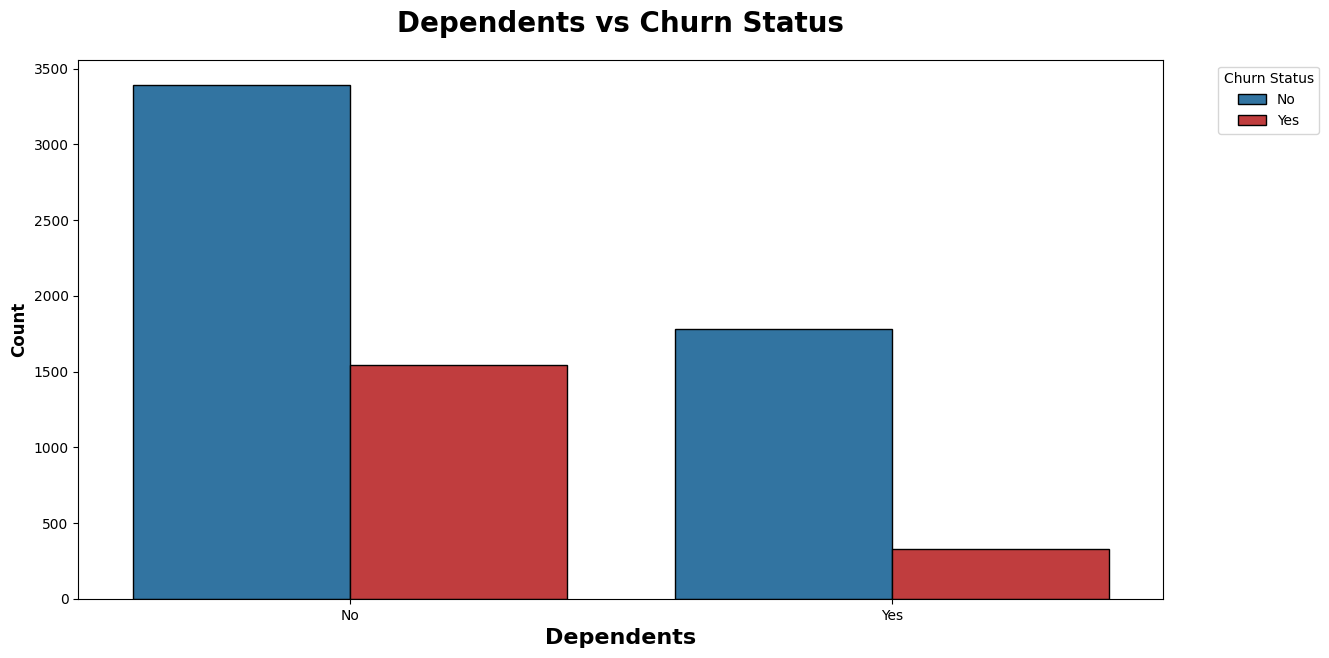

In [37]:
# Plot the count of dependents by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="Dependents", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Dependents vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Dependents", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

<Figure size 1400x700 with 0 Axes>

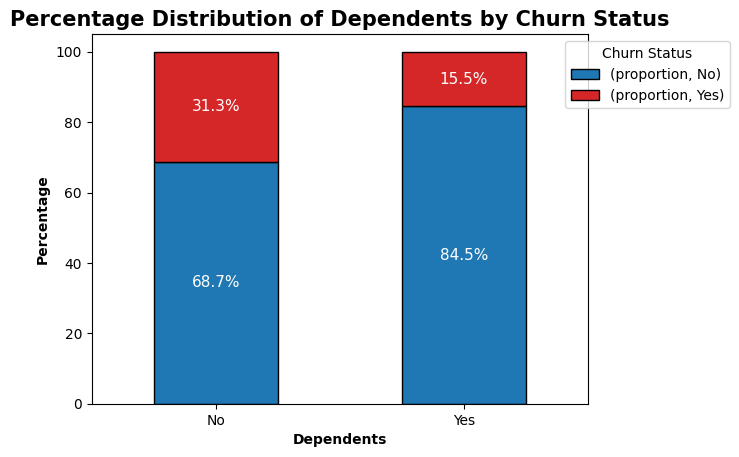

In [38]:
# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = dependents_churn.unstack().plot(kind='bar', stacked=True, color=new_palette, edgecolor='black')
plt.title("Percentage Distribution of Dependents by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Dependents', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [39]:

# Group data by phone service and churn status, calculate percentages
phone_service_churn = df.groupby('PhoneService')['Churn'].value_counts(normalize=True).to_frame() * 100
phone_service_churn

proportion
PhoneService Churn            
No           No      75.073314
             Yes     24.926686
Yes          No      73.290363
             Yes     26.709637

                                 proportion
PaymentMethod             Churn            
Bank transfer (automatic) No      83.290155
                          Yes     16.709845
Credit card (automatic)   No      84.756899
                          Yes     15.243101
Electronic check          No      54.714588
                          Yes     45.285412
Mailed check              No      80.893300
                          Yes     19.106700


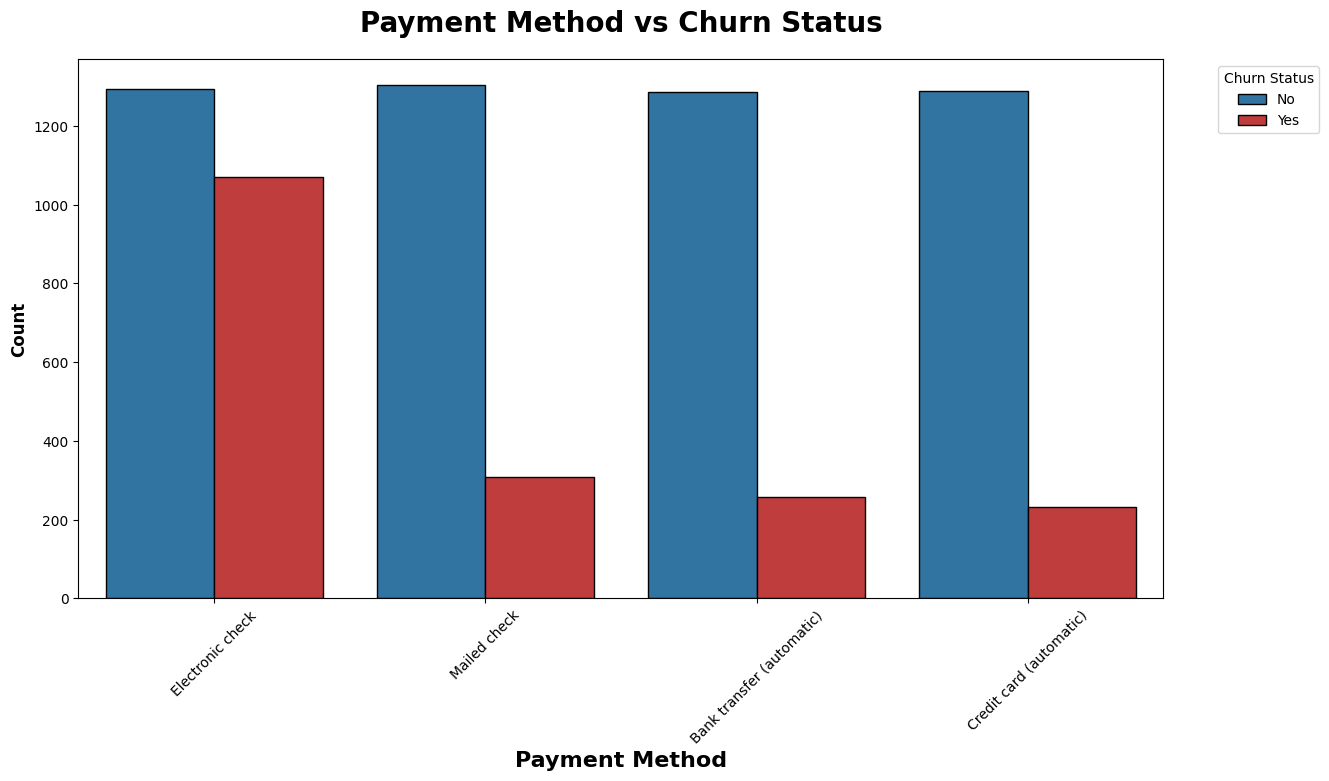

<Figure size 1400x700 with 0 Axes>

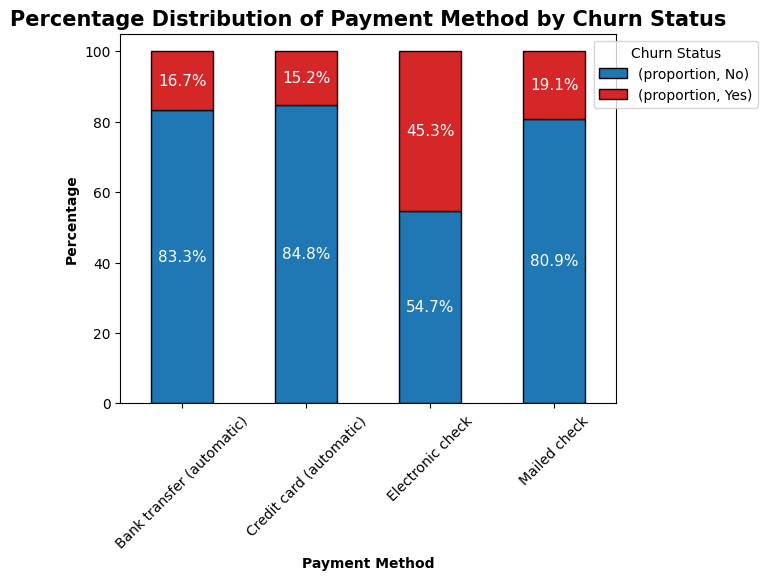

In [40]:
# Group data by payment method and churn status, calculate percentages
payment_method_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).to_frame() * 100
print(payment_method_churn)

# Plot the count of payment method by churn status
plt.subplots(figsize=(14, 7))
sns.countplot(x="PaymentMethod", hue="Churn", data=df, ec="black", palette=new_palette)
plt.title("Payment Method vs Churn Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Payment Method", weight="bold", fontsize=16)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45)
plt.show()

# Plot the percentage distribution
plt.figure(figsize=[14, 7])
ax = payment_method_churn.unstack().plot(kind='bar', stacked=True, color=new_palette, edgecolor='black')
plt.title("Percentage Distribution of Payment Method by Churn Status", fontsize=15, fontweight='bold')

# Add percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

plt.xlabel('Payment Method', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title="Churn Status", fancybox=True, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()